# _________________________Jose portilla________________________


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling 

%matplotlib inline


# ____________________________________

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics 

In [3]:
#! pip install pandas_profiling

In [3]:
data = pd.read_csv("/home/rohan/Documents/ROHAN_DA/UDEMY/Refactored_Py_DS_ML_Bootcamp-master/11-Linear-Regression/USA_Housing.csv")

In [4]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562388,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928702,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626581,15938.657923,997577.135049,1.232669e+06,1.471210e+06,2.469066e+06


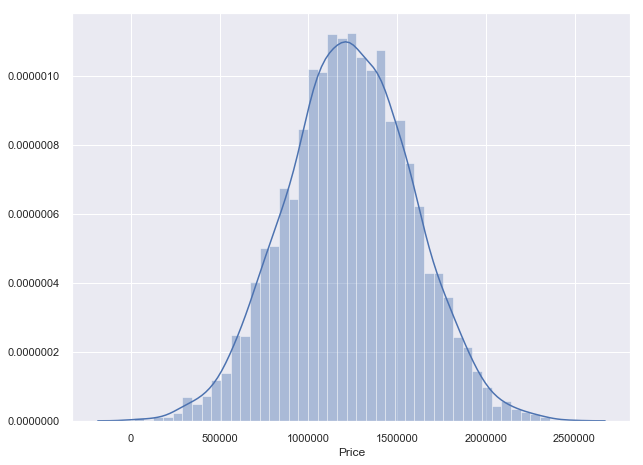

In [63]:
sns.set()
sns.distplot(data['Price'])

In [10]:
dc = data.corr()

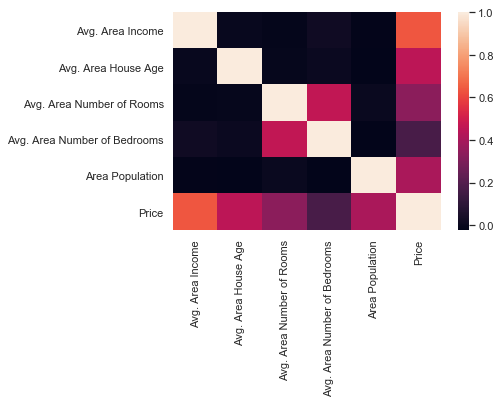

In [11]:
sns.heatmap(dc)

# Detailed profiling using pandas profiling

In [12]:
#Detailed profiling using pandas profiling

pandas_profiling.ProfileReport(data)

Number of variables,7
Number of observations,5000
Total Missing (%),0.0%
Total size in memory,273.5 KiB
Average record size in memory,56.0 B
Numeric,6
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,0


# Creating and training the model

In [64]:
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']

In [65]:
train_test_split.__class__

function

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [67]:
y_train.shape

(3000,)

In [68]:
lm = LinearRegression() 

# LinearRegression is an object of abc.ABCMeta class 
# ABC is abstract bases classes
# this ABCMeta is the metaclass for abstract bases classes 

In [72]:
lm.fit(X= X_train, y= y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
lm.intercept_

-2640159.796851911

In [74]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

- Coefficients for IV

In [23]:
pd.DataFrame(pd.Series(data = dict(zip(X_train.columns,lm.coef_))),columns= ['slope'])

,slope
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


### R^2 score

In [75]:
lm.score(X_train,y_train)

0.9181223200568411

In [76]:
predict = pd.Series(lm.predict(X_test))

In [77]:
data.Price.describe()

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64

## Cross_check

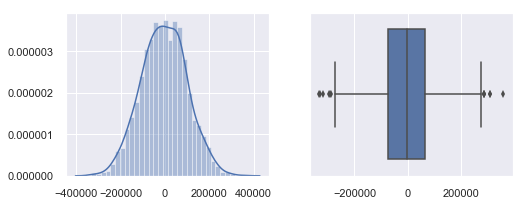

In [78]:
# plotting the residuals 

y = y_test.reset_index(drop= True)
plot = y - predict

plt.figure(figsize= (8,3))
plt.subplot(121)
sns.distplot(plot)

plt.subplot(122)
sns.boxplot(plot)

Text(0,0.5,'predict')

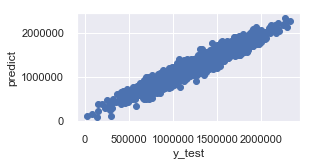

In [79]:
plt.figure(figsize= (4,2))

plt.scatter(y_test,predict)


plt.xlabel('y_test')
plt.ylabel('predict')

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 82288.22251914957
MSE: 10460958907.209501
RMSE: 102278.82922291153


# -------------------------------------ALABS---------------------------------------

# ------------------------------------CarSales casestudy -------------------------------

In [80]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

<Figure size 720x540 with 0 Axes>

In [81]:
from sklearn.model_selection import train_test_split #sklearm.cross_validation has been deprecated
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import imputation
from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import  Lasso, Ridge, ElasticNet
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.manifold import TSNE
# from sklearn.cluster import KMeans, DBSCAN
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [82]:
sales = pd.read_csv('/home/rohan/Documents/ROHAN_DA/ALABS/___STATS___ -  cls 10 onwards/class 13_Linear_Reg/Linear Regression files/Case Study - Automobile Example - Class Exercise/Car_sales.csv')

In [83]:
sales.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [84]:
sales.describe()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [85]:
sales_num = sales._get_numeric_data()

In [86]:
sales_cat = sales.select_dtypes(include='object').head()

In [87]:
# ls = []
# for x,y in  dict(sales.dtypes).items():
#     if y == 'object':
#         ls.append(x)

# print(ls)

cat_var_names=[key for key in dict(sales.dtypes) if dict(sales.dtypes)[key] in ['object']]

## summary

In [94]:
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=sales_num.apply(lambda x: var_summary(x)).T

In [93]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8320.698000,52.998076,29.450000,68.029422,4628.002257,0.110000,0.93728,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,260.645320,540.561000
four_year_resale_value,121.0,36.0,2186.830000,18.072975,14.180000,11.453384,131.180007,5.160000,6.17300,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,60.220000,67.550000
Price_in_thousands,155.0,2.0,4245.567000,27.390755,22.799000,14.351653,205.969949,9.235000,10.23144,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,78.479800,85.500000
Engine_size,156.0,1.0,477.500000,3.060897,3.000000,1.044653,1.091300,1.000000,1.55500,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,8.000000
Horsepower,156.0,1.0,29008.000000,185.948718,177.500000,56.700321,3214.926385,55.000000,96.40000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,325.750000,450.000000
Wheelbase,156.0,1.0,16768.000000,107.487179,107.000000,7.641303,58.389512,92.600000,92.87500,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,134.375000,138.700000
Width,156.0,1.0,11099.400000,71.150000,70.550000,3.451872,11.915419,62.600000,66.08500,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.190000,79.900000
Length,156.0,1.0,29225.600000,187.343590,187.900000,13.431754,180.412023,149.400000,154.91500,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,219.305000,224.500000
Curb_weight,155.0,2.0,523.594000,3.378026,3.342000,0.630502,0.397532,1.895000,2.24540,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.396680,5.572000
Fuel_capacity,156.0,1.0,2800.500000,17.951923,17.200000,3.887921,15.115932,10.300000,11.90000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.900000,32.000000


In [95]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=sales_cat.apply(lambda x: cat_summary(x))

In [96]:
cat_summary.T

,N,NMISS,ColumnsNames
Manufacturer,5,0,"Acura 4 Audi 1 Name: Manufacturer, dtyp..."
Model,5,0,TL 1 CL 1 A4 1 RL ...
Vehicle_type,5,0,"Passenger 5 Name: Vehicle_type, dtype: int64"
Latest_Launch,5,0,6/3/2011 1 1/4/2012 1 10/8/2011 1 2...


In [97]:
pandas_profiling.ProfileReport(sales)

Number of variables,16
Number of observations,157
Total Missing (%),1.9%
Total size in memory,19.7 KiB
Average record size in memory,128.5 B
Numeric,10
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,2


## Handling Outliers

In [98]:
sales.Sales_in_thousands = sales.Sales_in_thousands.clip_upper(sales.Sales_in_thousands.quantile(0.95))
sales.Sales_in_thousands = sales.Sales_in_thousands.clip_lower(sales.Sales_in_thousands.quantile(0.05))


In [100]:
sales_num.apply(lambda x:var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,7619.795000,48.533726,29.450000,49.600320,2460.191752,1.870800,1.87080,1.871760,5.453600,14.114000,29.450000,67.956000,127.641600,182.466440,185.336200,185.336200
four_year_resale_value,121.0,36.0,2186.830000,18.072975,14.180000,11.453384,131.180007,5.160000,6.17300,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,60.220000,67.550000
Price_in_thousands,155.0,2.0,4245.567000,27.390755,22.799000,14.351653,205.969949,9.235000,10.23144,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,78.479800,85.500000
Engine_size,156.0,1.0,477.500000,3.060897,3.000000,1.044653,1.091300,1.000000,1.55500,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,8.000000
Horsepower,156.0,1.0,29008.000000,185.948718,177.500000,56.700321,3214.926385,55.000000,96.40000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,325.750000,450.000000
Wheelbase,156.0,1.0,16768.000000,107.487179,107.000000,7.641303,58.389512,92.600000,92.87500,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,134.375000,138.700000
Width,156.0,1.0,11099.400000,71.150000,70.550000,3.451872,11.915419,62.600000,66.08500,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.190000,79.900000
Length,156.0,1.0,29225.600000,187.343590,187.900000,13.431754,180.412023,149.400000,154.91500,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,219.305000,224.500000
Curb_weight,155.0,2.0,523.594000,3.378026,3.342000,0.630502,0.397532,1.895000,2.24540,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.396680,5.572000
Fuel_capacity,156.0,1.0,2800.500000,17.951923,17.200000,3.887921,15.115932,10.300000,11.90000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.900000,32.000000


### Capping the complete DF

In [47]:
# Alternativelt we can do this as well

#sales.apply(lambda x:x.clip_lower(x.quantile(0.05)))

In [101]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

#car_sales_num=sales_num.apply(lambda x:outlier_capping(x))
car_sales_num1=sales_num.apply(outlier_capping)

car_sales_num1.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [102]:
car_sales_num1.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,7619.795000,48.533726,29.450000,49.600320,2460.191752,1.87080,1.870800,1.871760,5.453600,14.114000,29.450000,67.956000,127.641600,182.466440,185.336200,185.336200
four_year_resale_value,121.0,36.0,2180.421000,18.020008,14.180000,11.181335,125.022260,6.17300,6.423400,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,59.896000,60.220000
Price_in_thousands,155.0,2.0,4235.955480,27.328745,22.799000,14.063970,197.795238,10.23144,10.476362,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,76.584508,78.479800
Engine_size,156.0,1.0,475.810000,3.050064,3.000000,0.982279,0.964871,1.55500,1.579750,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,5.700000
Horsepower,156.0,1.0,28910.300000,185.322436,177.500000,52.816470,2789.579526,96.40000,98.380000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,317.087500,325.750000
Wheelbase,156.0,1.0,16760.100000,107.436538,107.000000,7.424295,55.120156,92.87500,92.998750,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,132.518750,134.375000
Width,156.0,1.0,11102.450000,71.169551,70.550000,3.390339,11.494400,66.08500,66.258250,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.140500,79.190000
Length,156.0,1.0,29223.940000,187.332949,187.900000,13.120350,172.143594,154.91500,156.226750,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,217.102250,219.305000
Curb_weight,155.0,2.0,523.770160,3.379162,3.342000,0.621764,0.386591,2.24540,2.247884,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.394693,5.396680
Fuel_capacity,156.0,1.0,2799.900000,17.948077,17.200000,3.819854,14.591287,11.90000,11.900000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.405000,30.900000


###  Handling NA values

In [109]:
car_sales_num1.four_year_resale_value

0      16.360000
1      19.875000
2      18.225000
3      29.725000
4      22.255000
5      23.555000
6      39.000000
7      18.020008
8      28.675000
9      36.125000
10     12.475000
11     13.740000
12     20.190000
13     13.360000
14     22.525000
15     27.100000
16     25.725000
17     18.225000
18     18.020008
19      9.250000
20     11.225000
21     10.310000
22     11.525000
23     13.025000
24     36.225000
25      9.125000
26      6.173000
27     18.020008
28     12.360000
29     14.180000
         ...    
127    18.020008
128    18.020008
129     9.200000
130    10.590000
131    10.790000
132    18.020008
133    18.020008
134    18.020008
135    18.020008
136    10.025000
137    13.245000
138    18.140000
139    15.445000
140     9.575000
141    18.020008
142    13.325000
143    19.425000
144    34.080000
145    11.425000
146    13.240000
147    16.725000
148    16.575000
149    13.760000
150    18.020008
151    18.020008
152    18.020008
153    18.020008
154    18.0200

In [110]:
#sales = sales._get_numeric_data().apply(lambda x:x.fillna(x.mean())) - This can also be used directly 
                                                                   # - without any UDF involvement

def Fill_null(x):
    x = x.fillna(x.mean())
    return x
     

In [111]:
car_sales_num1 = car_sales_num1.apply(Fill_null)

In [112]:
sales.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [113]:
car_sales_num1.isnull().sum()

Sales_in_thousands        0
four_year_resale_value    0
Price_in_thousands        0
Engine_size               0
Horsepower                0
Wheelbase                 0
Width                     0
Length                    0
Curb_weight               0
Fuel_capacity             0
Fuel_efficiency           0
Power_perf_factor         0
dtype: int64

## Handling categorical features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

What are the categorical features in our dataset?

- **Ordered categories:** weather (already encoded with sensible numeric values)
- **Unordered categories:** season (needs dummy encoding), holiday (already dummy encoded), workingday (already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an **ordered relationship**. Instead, we create **multiple dummy variables:**

In [114]:
sales.Manufacturer.nunique()

30

In [115]:
pd.get_dummies(sales.Vehicle_type,prefix= 'D_',drop_first= True).shape

(157, 1)

In [116]:
pd.get_dummies(sales.Manufacturer,prefix= 'D_',drop_first= True).shape

(157, 29)

### commented is how i would have done it 

In [117]:
# test = pd.get_dummies(sales,prefix= 'D_',columns= ['Vehicle_type','Manufacturer'],drop_first= True).head()

In [118]:
#test[test.select_dtypes(include = 'uint8').columns.tolist()] = test[test.select_dtypes(include = 'uint8').columns.tolist()].astype('category')

In [119]:
# A utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [120]:
#for c_feature in categorical_features
car_sales_cat=sales[['Manufacturer', 'Vehicle_type']]

for c_feature in ['Manufacturer', 'Vehicle_type']:
    car_sales_cat[c_feature] = car_sales_cat[c_feature].astype('category')
    car_sales_cat = create_dummies(car_sales_cat , c_feature )

/home/rohan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


### SALES_NEW __ final df (categorical treated || null treated || capping)

In [122]:
sales_new = pd.concat([car_sales_num1, car_sales_cat], axis=1)

sales_new.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,16.919,16.360,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0,0,0,0,0,0,0,0,0,1
1,39.384,19.875,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0,0,0,0,0,0,0,0,0,1
2,14.114,18.225,27.328745,3.2,225.0,106.9,70.6,192.0,3.470,17.2,...,0,0,0,0,0,0,0,0,0,1
3,8.588,29.725,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,...,0,0,0,0,0,0,0,0,0,1
4,20.397,22.255,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,...,0,0,0,0,0,0,0,0,0,1


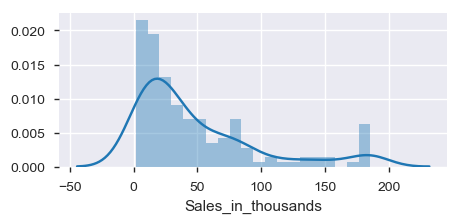

In [123]:
plt.figure(figsize= (5,2))
sns.distplot(sales_new.Sales_in_thousands,bins= 20)

## logaritmic scaling of all the values

In [124]:
sales_new['log_sales_in_thousand'] = np.log(sales_new.Sales_in_thousands)
#sales_new

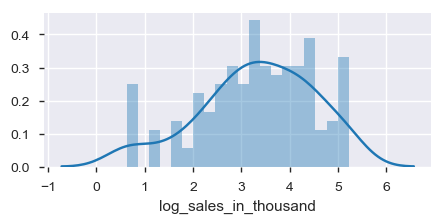

In [125]:
plt.figure(figsize= (5,2))
sns.distplot(sales_new.log_sales_in_thousand,bins = 20)

In [40]:
# WHY???

#sales_new.drop(columns= 'Sales_in_thousands',inplace= True)

In [127]:
sales_C = sales_new.corr()

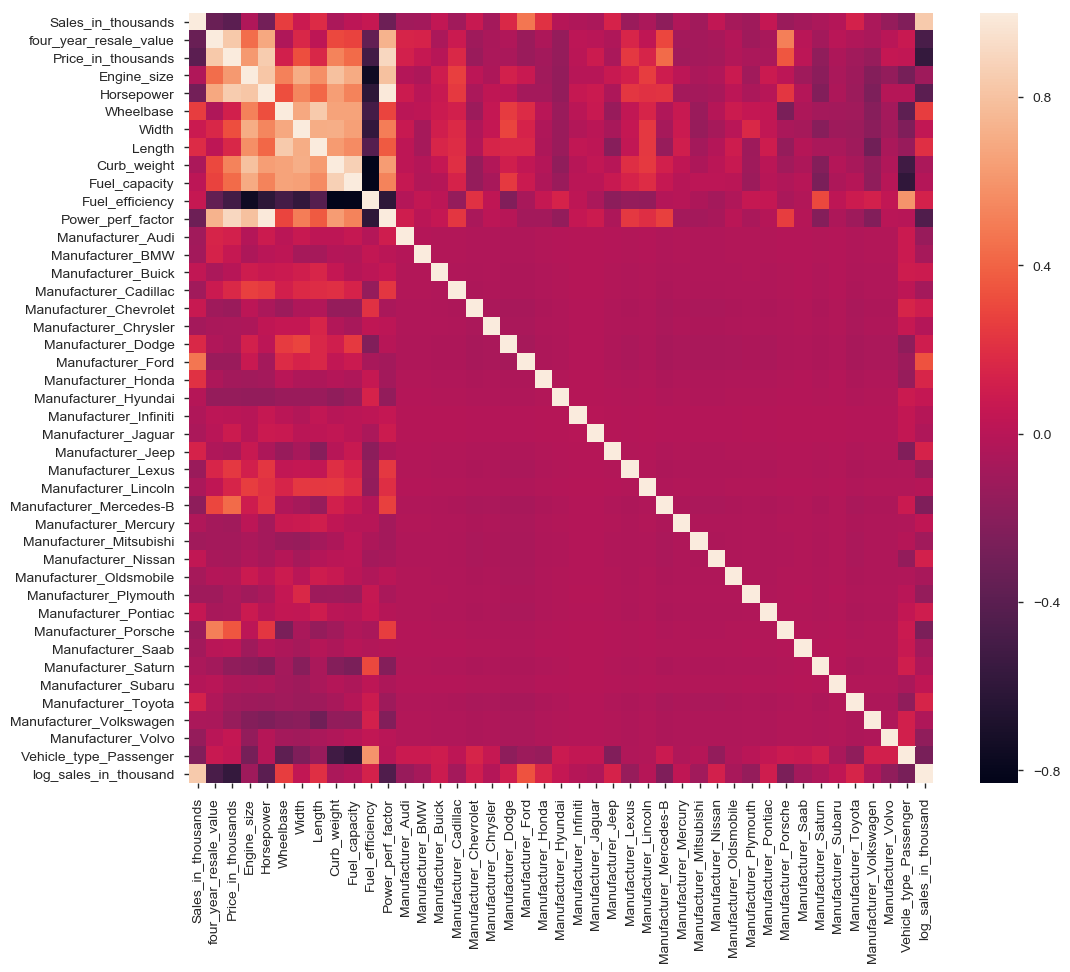

In [128]:
plt.figure(figsize= (12,10))

sns.heatmap(sales_C)

In [129]:
sales_new.head() 

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger,log_sales_in_thousand
0,16.919,16.360,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0,0,0,0,0,0,0,0,1,2.828437
1,39.384,19.875,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0,0,0,0,0,0,0,0,1,3.673360
2,14.114,18.225,27.328745,3.2,225.0,106.9,70.6,192.0,3.470,17.2,...,0,0,0,0,0,0,0,0,1,2.647167
3,8.588,29.725,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,...,0,0,0,0,0,0,0,0,1,2.150366
4,20.397,22.255,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,...,0,0,0,0,0,0,0,0,1,3.015388


In [130]:
#Splitting the data

# Here pd.columns.difference([col1,col2]) - gives us  columns without these columns 

feature_columns = sales_new.columns.difference( ['ln_sales_in_thousands', 'Sales_in_thousands'] )
feature_columns

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Length', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Power_perf_factor', 'Price_in_thousands', 'Vehicle_type_Passenger',
       'Wheelbase', 'Width', 'four_year_resale_value',
       'log_

In [196]:
train_X, test_X, train_y, test_y = train_test_split(sales_new[feature_columns],sales_new['log_sales_in_thousand'],test_size = 0.3, random_state= 123)

In [184]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(109, 42)
(48, 42)
(109,)
(48,)


In [177]:
sales_new = sales_new.apply(lambda x:x.fillna(x.mean()))
#sales_new.isnull().sum()

In [178]:
lm = LinearRegression()

lm.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [197]:
train_X.columns.shape

(42,)

In [182]:
lm.coef_.shape

(42,)

In [183]:
lm.intercept_

1.4424017535930034e-12

In [168]:
model_coeff = pd.DataFrame(data = lm.coef_,index = train_X.columns,columns= ['coeff_']).T

model_coeff

,Curb_weight,Engine_size,Fuel_capacity,Fuel_efficiency,Horsepower,Length,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,...,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Power_perf_factor,Price_in_thousands,Vehicle_type_Passenger,Wheelbase,Width,four_year_resale_value,log_sales_in_thousand
coeff_,-9.606657e-14,4.836626e-14,1.544294e-14,-1.727594e-14,-1.048504e-14,-3.798649e-17,-4.911120e-13,-7.075273e-13,-3.177198e-13,-5.132236e-13,...,-5.962155e-13,-4.651195e-13,-2.712753e-13,2.527167e-14,-1.074311e-14,3.568817e-14,-4.375811e-15,-3.592469e-16,3.135027e-16,1.0


## Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

The $\beta$ values are called the **model coefficients**:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors").
- And once we've learned these coefficients, we can use the model to predict the response.

![Estimating coefficients](images/estimating_coefficients.png)

In the diagram above:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the vertical distances between the observed values and the least squares line.

## Building a linear regression model

## Model_1

In [185]:
import statsmodels.api as sm 

In [194]:
train_X.shape

(3000, 6)

In [199]:
## Its important while using sm that we add constant for proper model building
## Not sure if the same is req. in case of logistic regression model

train_X = sm.add_constant(train_X)


lm_=sm.OLS(train_y,train_X).fit()

In [200]:
train_X.shape,X_train.shape

((109, 43), (3000, 5))

In [201]:
lm_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     log_sales_in_thousand   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                  1.000
Method:                    Least Squares   F-statistic:                 1.568e+27
Date:                   Fri, 24 May 2019   Prob (F-statistic):               0.00
Time:                           17:16:55   Log-Likelihood:                 3208.5
No. Observations:                    109   AIC:                            -6335.
Df Residuals:                         68   BIC:                            -6225.
Df Model:                             40                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3.553e-15   2.33e-13     -0.015      0.988   -4.68e-13    4.61e-13
Curb_weight              1.243e-14   2.97e-14      0.419      0.677   -4.68e-14    7.17e-14
Engine_size             -1.443e-15   1.77e-14     -0.082      0.935   -3.68e-14    3.39e-14
Fuel_capacity           -1.221e-15   4.46e-15     -0.274      0.785   -1.01e-14    7.67e-15
Fuel_efficiency         -2.498e-16   4.15e-15     -0.060      0.952   -8.54e-15    8.04e-15
Horsepower               2.359e-16   1.56e-15      0.151      0.880   -2.87e-15    3.35e-15
Length                  -2.637e-16   1.41e-15     -0.187      0.852   -3.08e-15    2.55e-15
Manufacturer_Audi        1.843e-14   6.76e-14      0.273      0.786   -1.16e-13    1.53e-13
Manufacturer_BMW         2.021e-14   6.47e-14      0.312      0.756   -1.09e-13    1.49e-13
Manufacturer_Buick        1.61e-14   4.88e-14      0.330      0.743   -8.13e-14    1.13e-13
Manufacturer_Cadillac    1.493e-14   4.58e-14      0.326      0.746   -7.65e-14    1.06e-13
Manufacturer_Chevrolet   1.155e-14   4.68e-14      0.247      0.806   -8.19e-14    1.05e-13
Manufacturer_Chrysler    1.427e-14      5e-14      0.285      0.776   -8.56e-14    1.14e-13
Manufacturer_Dodge       1.343e-14   4.79e-14      0.280      0.780   -8.22e-14    1.09e-13
Manufacturer_Ford        1.568e-14   4.63e-14      0.338      0.736   -7.68e-14    1.08e-13
Manufacturer_Honda       1.821e-14   5.63e-14      0.323      0.747   -9.42e-14    1.31e-13
Manufacturer_Hyundai     3.064e-14   5.54e-14      0.553      0.582   -7.98e-14    1.41e-13
Manufacturer_Infiniti    7.848e-18   3.26e-29   2.41e+11      0.000    7.85e-18    7.85e-18
Manufacturer_Jaguar     -4.885e-15   6.69e-14     -0.073      0.942   -1.38e-13    1.29e-13
Manufacturer_Jeep        1.804e-14   6.28e-14      0.287      0.775   -1.07e-13    1.43e-13
Manufacturer_Lexus       1.044e-14   4.68e-14      0.223      0.824   -8.29e-14    1.04e-13
Manufacturer_Lincoln     1.832e-14   5.09e-14      0.360      0.720   -8.33e-14     1.2e-13
Manufacturer_Mercedes-B  1.554e-14   4.38e-14      0.355      0.724   -7.19e-14    1.03e-13
Manufacturer_Mercury     1.887e-14    5.3e-14      0.356      0.723   -8.68e-14    1.25e-13
Manufacturer_Mitsubishi  2.021e-14   4.66e-14      0.433      0.666   -7.28e-14    1.13e-13
Manufacturer_Nissan      1.554e-14   4.85e-14      0.321      0.749   -8.12e-14    1.12e-13
Manufacturer_Oldsmobile  1.932e-14   4.59e-14      0.421      0.675   -7.23e-14    1.11e-13
Manufacturer_Plymouth   -3.997e-15   9.14e-14     -0.044      0.965   -1.86e-13    1.78e-13
Manufacturer_Pontiac     1.188e-14   4.64e-14      0.256      0.799   -8.07e-14    1.04e-13
Manufacturer_Porsche     1.332e-14   6.58e-14      0.202      0.840   -1.18e-13    1.45e-13
Manufacturer_S

In [58]:
# print('Parameters: ', lm.params)
# print('R2: ', lm.rsquared)

In [202]:
test_X.head(2)

,Curb_weight,Engine_size,Fuel_capacity,Fuel_efficiency,Horsepower,Length,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,...,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Power_perf_factor,Price_in_thousands,Vehicle_type_Passenger,Wheelbase,Width,four_year_resale_value,log_sales_in_thousand
24,3.21,5.7,19.1,22.0,325.75,179.7,0,0,0,0,...,0,0,0,141.119461,45.705,1,104.5,73.6,36.225,2.887423
23,3.50,3.8,16.8,25.0,200.00,193.2,0,0,0,0,...,0,0,0,81.118543,24.340,1,101.1,74.1,13.025,3.273440


In [204]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print( 'MSE:', metrics.mean_squared_error(test_y, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))
print('R-squre:', metrics.r2_score(test_y, y_pred))

ValueError: shapes (48,43) and (42,) not aligned: 43 (dim 1) != 42 (dim 0)

## Method-2

In [205]:
import statsmodels.formula.api as smf

In [206]:
sales1 = pd.read_csv('/home/rohan/Documents/ROHAN_DA/ALABS/___STATS___ -  cls 10 onwards/class 13_Linear_Reg/Linear Regression files/Case Study - Automobile Example - Class Exercise/Car_sales.csv')

In [66]:
sales1.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [207]:
sales1_cat = sales1.select_dtypes('object')

In [208]:
sales1_num = sales1._get_numeric_data()

In [209]:
sales1_num.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8320.698000,52.998076,29.450000,68.029422,4628.002257,0.110000,0.93728,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,260.645320,540.561000
four_year_resale_value,121.0,36.0,2186.830000,18.072975,14.180000,11.453384,131.180007,5.160000,6.17300,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,60.220000,67.550000
Price_in_thousands,155.0,2.0,4245.567000,27.390755,22.799000,14.351653,205.969949,9.235000,10.23144,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,78.479800,85.500000
Engine_size,156.0,1.0,477.500000,3.060897,3.000000,1.044653,1.091300,1.000000,1.55500,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,8.000000
Horsepower,156.0,1.0,29008.000000,185.948718,177.500000,56.700321,3214.926385,55.000000,96.40000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,325.750000,450.000000
Wheelbase,156.0,1.0,16768.000000,107.487179,107.000000,7.641303,58.389512,92.600000,92.87500,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,134.375000,138.700000
Width,156.0,1.0,11099.400000,71.150000,70.550000,3.451872,11.915419,62.600000,66.08500,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.190000,79.900000
Length,156.0,1.0,29225.600000,187.343590,187.900000,13.431754,180.412023,149.400000,154.91500,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,219.305000,224.500000
Curb_weight,155.0,2.0,523.594000,3.378026,3.342000,0.630502,0.397532,1.895000,2.24540,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.396680,5.572000
Fuel_capacity,156.0,1.0,2800.500000,17.951923,17.200000,3.887921,15.115932,10.300000,11.90000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.900000,32.000000


In [210]:
sales1_num.Price_in_thousands.isnull().sum()

2

In [211]:
sales1_num = sales1_num.apply(lambda x:x.fillna(x.mean()))

In [212]:
sales1new = pd.concat([sales1_num,sales1_cat],axis = 1)

In [213]:
sales1new.select_dtypes('object').columns

Index(['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch'], dtype='object')

In [214]:
sales1new = pd.get_dummies(data = sales1new,columns= ['Manufacturer', 'Vehicle_type'],prefix = 'D_',drop_first= True)

In [215]:
sales1new.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,D__Plymouth,D__Pontiac,D__Porsche,D__Saab,D__Saturn,D__Subaru,D__Toyota,D__Volkswagen,D__Volvo,D__Passenger
0,16.919,16.360,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0,0,0,0,0,0,0,0,0,1
1,39.384,19.875,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0,0,0,0,0,0,0,0,0,1
2,14.114,18.225,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,...,0,0,0,0,0,0,0,0,0,1
3,8.588,29.725,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,...,0,0,0,0,0,0,0,0,0,1
4,20.397,22.255,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,...,0,0,0,0,0,0,0,0,0,1


In [216]:
s1c = sales1new.corr()

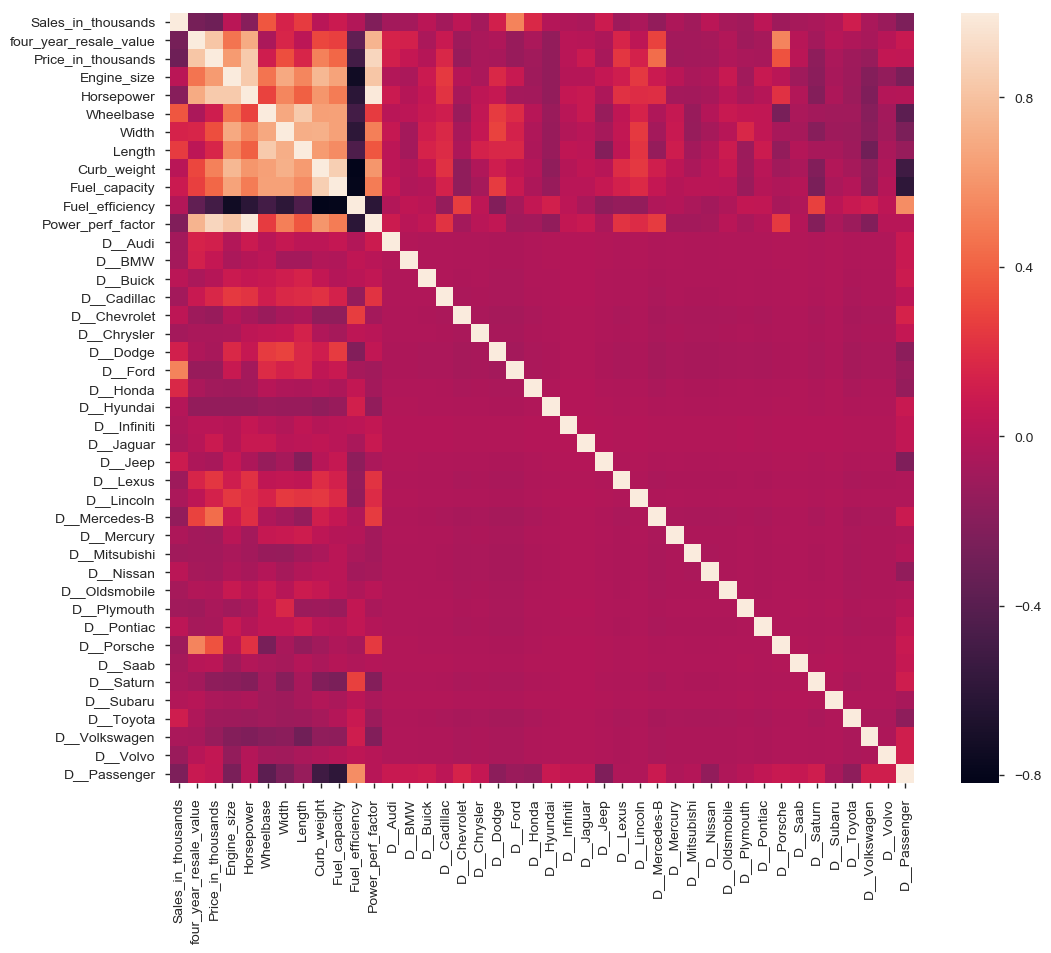

In [217]:
plt.figure(figsize=(12,10))
sns.heatmap(s1c)

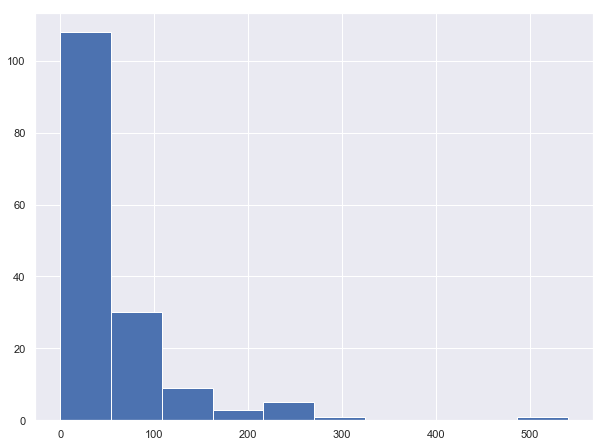

In [114]:
sales1new.Sales_in_thousands.hist()

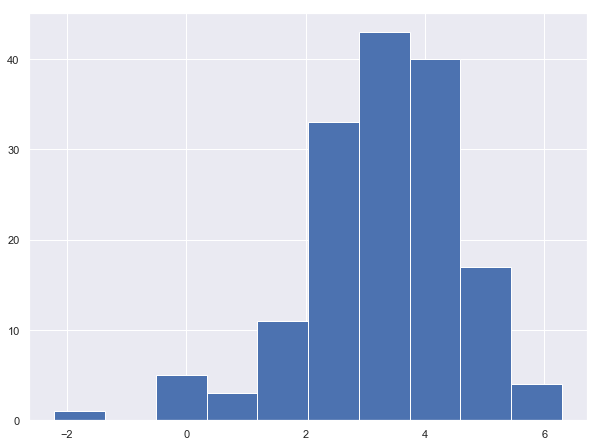

In [115]:
np.log(sales1new.Sales_in_thousands).hist()

In [218]:
sales1new['ln_Sales_in_thousands'] = np.log(sales1new.Sales_in_thousands)

In [219]:
sales1new.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,D__Pontiac,D__Porsche,D__Saab,D__Saturn,D__Subaru,D__Toyota,D__Volkswagen,D__Volvo,D__Passenger,ln_Sales_in_thousands
0,16.919,16.360,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0,0,0,0,0,0,0,0,1,2.828437
1,39.384,19.875,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0,0,0,0,0,0,0,0,1,3.673360
2,14.114,18.225,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,...,0,0,0,0,0,0,0,0,1,2.647167
3,8.588,29.725,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,...,0,0,0,0,0,0,0,0,1,2.150366
4,20.397,22.255,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,...,0,0,0,0,0,0,0,0,1,3.015388


## Modelling `

In [220]:
import statsmodels.formula.api as smf

In [221]:
x_cols = sales1new.columns.difference(['ln_Sales_in_thousands','Sales_in_thousands'])

In [222]:
y_cols =  sales1new['ln_Sales_in_thousands']

In [223]:
train,test = train_test_split(sales1new,test_size = 0.3, random_state =  123)

In [224]:
train.shape

(109, 45)

In [225]:
train.columns

Index(['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Model', 'Latest_Launch', 'D__Audi', 'D__BMW', 'D__Buick',
       'D__Cadillac', 'D__Chevrolet', 'D__Chrysler', 'D__Dodge', 'D__Ford',
       'D__Honda', 'D__Hyundai', 'D__Infiniti', 'D__Jaguar', 'D__Jeep',
       'D__Lexus', 'D__Lincoln', 'D__Mercedes-B', 'D__Mercury',
       'D__Mitsubishi', 'D__Nissan', 'D__Oldsmobile', 'D__Plymouth',
       'D__Pontiac', 'D__Porsche', 'D__Saab', 'D__Saturn', 'D__Subaru',
       'D__Toyota', 'D__Volkswagen', 'D__Volvo', 'D__Passenger',
       'ln_Sales_in_thousands'],
      dtype='object')

In [227]:
lm=smf.ols('ln_Sales_in_thousands~Price_in_thousands+four_year_resale_value+Engine_size+Curb_weight+Wheelbase+Width+Length+Horsepower+Fuel_capacity+Fuel_efficiency+D__Passenger', train).fit()

In [230]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.560
Model:                               OLS   Adj. R-squared:                  0.510
Method:                    Least Squares   F-statistic:                     11.23
Date:                   Fri, 24 May 2019   Prob (F-statistic):           3.77e-13
Time:                           17:20:37   Log-Likelihood:                -144.33
No. Observations:                    109   AIC:                             312.7
Df Residuals:                         97   BIC:                             345.0
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3.3082      3.100     -1.067      0.289      -9.462       2.845
Price_in_thousands        -0.0551      0.017     -3.159      0.002      -0.090      -0.020
four_year_resale_value     0.0175      0.017      1.060      0.292      -0.015       0.050
Engine_size                0.2948      0.210      1.401      0.164      -0.123       0.712
Curb_weight                0.1787      0.414      0.431      0.667      -0.644       1.001
Wheelbase                  0.0444      0.027      1.647      0.103      -0.009       0.098
Width                     -0.0068      0.052     -0.132      0.895      -0.109       0.095
Length                     0.0203      0.016      1.260      0.211      -0.012       0.052
Horsepower                -0.0043      0.005     -0.875      0.384      -0.014       0.005
Fuel_capacity             -0.0953      0.065     -1.457      0.148      -0.225       0.034
Fuel_efficiency            0.0634      0.044      1.450      0.150      -0.023       0.150
D__Passenger              -0.9805      0.396     -2.479      0.015      -1.766      -0.195
==============================================================================
Omnibus:                       38.378   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.574
Skew:                          -1.211   Prob(JB):                     1.79e-26
Kurtosis:                       7.499   Cond. No.                     1.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [231]:
pred = lm.predict(test)
pred.head()

24     1.970581
23     3.382494
138    3.270324
87     4.002553
134    3.305048
dtype: float64

In [232]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(test.ln_Sales_in_thousands, pred))
print ('MSE:', metrics.mean_squared_error(test.ln_Sales_in_thousands, pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test.ln_Sales_in_thousands, pred)))
print ('R-Squre:', metrics.r2_score(test.ln_Sales_in_thousands, pred))

MAE: 0.731778826577021
MSE: 1.0652255165009805
RMSE: 1.0320976293456838
R-Squre: 0.1975291784166857


In [233]:
pred = lm.predict(train)
pred_sales = np.exp(pred)-1
pred.head(5)

45     4.431541
129    4.461806
79     3.624311
153    2.917937
35     3.981673
dtype: float64

## Feature selection

How do we choose which features to include in the model? We're going to use **train/test split** (and eventually **cross-validation**).

Why not use of **p-values** or **R-squared** for feature selection?

- Linear models rely upon **a lot of assumptions** (such as the features being independent), and if those assumptions are violated, p-values and R-squared are less reliable. Train/test split relies on fewer assumptions.
- Features that are unrelated to the response can still have **significant p-values**.
- Adding features to your model that are unrelated to the response will always **increase the R-squared value**, and adjusted R-squared does not sufficiently account for this.
- p-values and R-squared are **proxies** for our goal of generalization, whereas train/test split and cross-validation attempt to **directly estimate** how well the model will generalize to out-of-sample data.

More generally:

- There are different methodologies that can be used for solving any given data science problem, and this course follows a **machine learning methodology**.
- This course focuses on **general purpose approaches** that can be applied to any model, rather than model-specific approaches.

### Evaluating Model Accuracy
> R-squared is a statistical measure of how close the data are to the fitted regression line. <br>
> R-square signifies percentage of variations in the reponse variable that can be explained by the model. <br>
> - R-squared = Explained variation / Total variation <br>
> - Total variation is variation of response variable around it's mean. <br>

> R-squared value varies between 0 and 100%. 0% signifies that the model explains none of the variability, <br>
while 100% signifies that the model explains all the variability of the response. <br>
The closer the r-square to 100%, the better is the model. <br>

In [166]:
import statsmodels as sm

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from patsy import dmatrices

In [56]:
%%capture
#gather features
#features = "+".join(car_sales.columns - ["Sales_in_thousands"])

# get y and X dataframes based on this regression
y, X = dmatrices('ln_Sales_in_thousands~Price_in_thousands+Wheelbase+D__Ford+D__Passenger', train, return_type='dataframe')

PatsyError: Error evaluating factor: NameError: name 'D__Passenger' is not defined
    ln_Sales_in_thousands~Price_in_thousands+Wheelbase+D__Ford+D__Passenger
                                                               ^^^^^^^^^^^^

In [179]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [VIF(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [192]:
VIF(X.values,0)

227.8741107077537

In [199]:
vif.round(2)

,VIF Factor,features
0,227.87,Intercept
1,1.10,Price_in_thousands
2,1.25,Wheelbase
3,1.06,D__Ford
4,1.18,D__Passenger


## Deciling 

In [234]:
lm1=smf.ols('ln_Sales_in_thousands~Price_in_thousands+Wheelbase+D__Passenger', train).fit()

In [235]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.520
Model:                               OLS   Adj. R-squared:                  0.507
Method:                    Least Squares   F-statistic:                     37.98
Date:                   Fri, 24 May 2019   Prob (F-statistic):           1.05e-16
Time:                           17:25:40   Log-Likelihood:                -149.03
No. Observations:                    109   AIC:                             306.1
Df Residuals:                        105   BIC:                             316.8
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.0802      1.389     -0.778      0.438      -3.834       1.673
Price_in_thousands    -0.0622      0.007     -9.266      0.000      -0.076      -0.049
Wheelbase              0.0601      0.012      4.824      0.000       0.035       0.085
D__Passenger          -0.3937      0.225     -1.747      0.084      -0.841       0.053
==============================================================================
Omnibus:                       45.959   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.547
Skew:                          -1.376   Prob(JB):                     6.23e-40
Kurtosis:                       8.673   Cond. No.                     1.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [253]:
train['y_pred_train'] = lm1.predict(train)

/home/rohan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [254]:
test.loc['y_pred_test'] = lm1.predict(test)

/home/rohan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [255]:
train['Deciles']=pd.qcut(train['y_pred_train'],10, labels=False)
test['Deciles']=pd.qcut(test['y_pred_test'],10, labels=False)

/home/rohan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/rohan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


- Here value for Index 4 > 5 that means we are prediction higher values(on avg) for value in decile 4 than values in decile 5

In [256]:
train[['Deciles','ln_Sales_in_thousands', 'y_pred_train']].groupby(train.Deciles).mean()

,Deciles,ln_Sales_in_thousands,y_pred_train
Deciles,,,
0,0,1.340816,1.233577
1,1,2.002259,2.674136
2,2,2.990499,3.006652
3,3,2.960106,3.283611
4,4,3.673382,3.450933
5,5,3.652155,3.572260
6,6,3.963950,3.724969
7,7,4.454428,3.905628
8,8,4.248005,4.026985


In [143]:
test[['Deciles','ln_Sales_in_thousands', 'y_pred_test']].groupby(test.Deciles).mean()

,Deciles,ln_Sales_in_thousands,y_pred_test
Deciles,,,
0.0,0.0,1.549367,1.036902
1.0,1.0,2.349071,2.868757
2.0,2.0,3.053258,3.215597
3.0,3.0,3.389908,3.405744
4.0,4.0,3.051634,3.598636
5.0,5.0,3.570457,3.718817
6.0,6.0,3.632628,3.811203
7.0,7.0,3.530941,3.887602
8.0,8.0,3.366675,4.006140


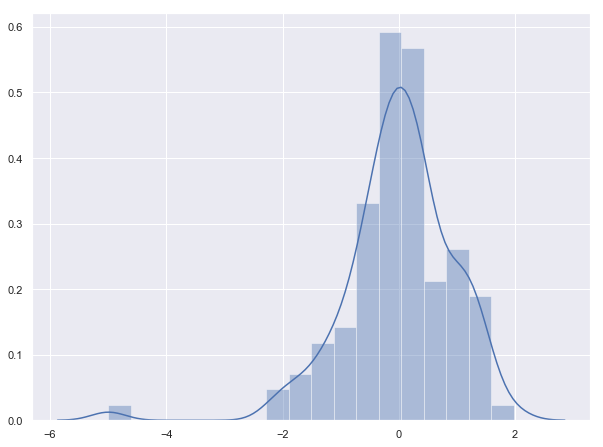

In [144]:
sns.distplot(lm1.resid)

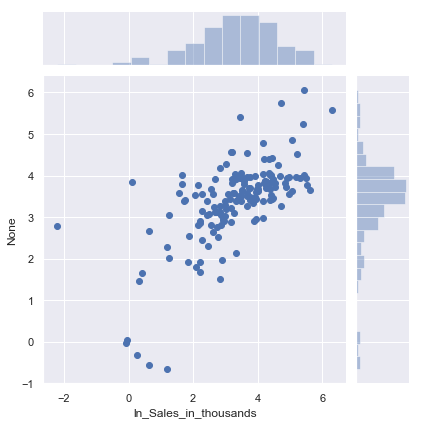

In [145]:
sns.jointplot(sales1new.ln_Sales_in_thousands, lm1.predict(sales1new) )

## Method 3 - Using Sk_learn

In [147]:
## Building the model with train set and make predictions on test set
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linreg = LinearRegression()
linreg.fit(train_X, train_y)

NameError: name 'train_y' is not defined

# ------------------------------------kirill ------------------------------------------------------

In [148]:
# Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression



# Importing the dataset
dataset = pd.read_csv('/home/rohan/Documents/ROHAN_DA/UDEMY/UDEMY_ML/REGRESSION/Data_Preprocessing/Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values

## Missing data[Imputation]

In [16]:
# Taking care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

### Handling categorical var

In [17]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [18]:
dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [19]:
# Splitting the dataset into the Training set and Test set

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0)

## Feature Scaling

#### WHY .FIT

The Imputer fills missing values with some statistics (e.g. mean, median, ...) of the data. To avoid data leakage during cross-validation, it computes the statistic on the train data during the fit, stores it and uses it on the test data, during the transform.

You can do both steps in one if your train and test data are identical, using fit_transform.

This data leakage issue is important, since the data distribution may change from the training data to the testing data, and you don't want the information of the testing data to be already present during the fit.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()

sc.fit_transform(x_train)

## _________________ Linear_regression

In [20]:
salary = pd.read_csv('/home/rohan/Documents/ROHAN_DA/UDEMY/UDEMY_ML/REGRESSION/Simple_Linear_Regression/Simple_Linear_Regression/Salary_Data.csv')

In [21]:
salary.shape

(30, 2)

In [22]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [59]:
x_train,x_test,y_train,y_test = train_test_split(salary[['YearsExperience']],salary.Salary,test_size = 0.2,random_state = 0)

In [57]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((24,), (6,), (24,), (6,))

#### Training set has to be a 2d object (cant be a series)

In [44]:
reg = LinearRegression()

reg.fit(x_train,y_train) # - here we are fitting our training data to the LR model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
print('intercept is:{}'.format(reg.intercept_))
print('coeff is: ',reg.coef_)

intercept is:26780.099150628186
coeff is:  [9312.57512673]


In [74]:
pred = reg.predict(x_test)
pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

### Plotting the output

####  Visualising the Test set results

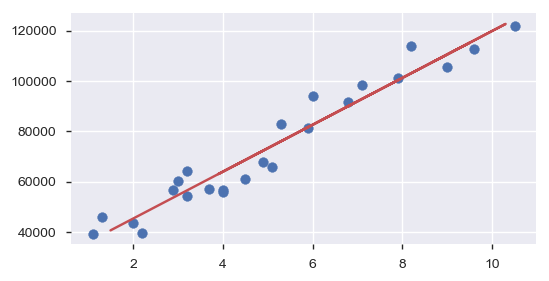

In [72]:
plt.figure(figsize= (6,3))
plt.scatter(x_train,y_train,c = 'b',cmap= 'viridis')
plt.plot(x_test,pred,color = 'r')

## Multivariate Regression

In [4]:
start_up = pd.read_csv('/home/rohan/Documents/ROHAN_DA/UDEMY/UDEMY_ML/REGRESSION/Multiple_Linear_Regression/Multiple_Linear_Regression/50_Startups.csv')

In [6]:
start_up.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Data review

In [8]:
pandas_profiling.ProfileReport(start_up)

Number of variables,5
Number of observations,50
Total Missing (%),0.0%
Total size in memory,2.0 KiB
Average record size in memory,41.6 B
Numeric,3
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,1


### summary_functions

In [10]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [26]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

### Segregating dtypes

In [22]:
start_up_num  = start_up._get_numeric_data()
pd.DataFrame(data = start_up_num)



start_up_num.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
R&D Spend,50.0,0.0,3686080.78,73721.6156,73051.080,45902.256482,2.107017e+09,0.00,0.0000,748.2310,14086.703,39936.3700,73051.080,101602.8000,135364.648,149360.415,164000.9650,165349.20
Administration,50.0,0.0,6067231.98,121344.6396,122699.795,28017.802755,7.849973e+08,51283.14,51508.5449,73613.3020,85013.773,103730.8750,122699.795,144842.1800,153540.042,155763.844,170419.2564,182645.56
Marketing Spend,50.0,0.0,10551254.89,211025.0978,212716.240,122290.310726,1.495492e+10,0.00,0.0000,856.7685,34814.225,129300.1325,212716.240,299469.0850,363192.066,396803.826,458120.1707,471784.10
Profit,50.0,0.0,5600631.96,112012.6392,107978.190,40306.180338,1.624588e+09,14681.40,24967.4849,45678.6890,65172.905,90138.9025,107978.190,139765.9775,157910.802,187383.610,192031.6427,192261.83


In [28]:
start_up_cat = start_up.select_dtypes(include= 'object')


start_up_cat.apply(cat_summary).T

,N,NMISS,ColumnsNames
State,50,0,New York 17 California 17 Florida ...


In [56]:
start_up_cat_N = pd.get_dummies(start_up_cat,drop_first= True)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [151]:
x =  np.abs(np.random.randn(1000))

print(x)

y = np.log(x/(1-x)) # this is sigmoid

[5.58328770e-01 1.09772459e+00 6.18838717e-01 7.16850497e-01
 4.77060670e-01 9.69345968e-01 3.23015638e-01 4.23322019e-01
 7.68007447e-01 2.22270251e-01 1.40283987e+00 1.81704040e+00
 1.08172364e+00 3.81841533e-01 6.43401545e-01 1.24218327e+00
 1.24944062e+00 8.12905297e-01 5.14339016e-01 5.00103422e-01
 1.42737633e+00 2.74548695e-01 3.27035524e-01 9.52960489e-01
 1.28309469e+00 1.22639592e+00 1.53448632e+00 1.50476706e-01
 1.75306851e+00 8.00912398e-01 1.50512300e+00 1.52870507e+00
 2.15527348e-01 6.64315226e-01 8.47846567e-02 7.33668357e-01
 1.16882876e+00 3.70158988e-01 2.06138869e+00 2.28223260e-03
 1.53602661e+00 3.28280211e-01 1.35089059e+00 4.89538932e-02
 2.51273761e-01 1.24678816e+00 4.26491496e-02 3.09833311e-01
 1.99944358e+00 1.31266953e-01 1.33072688e-01 1.35292685e+00
 1.73320007e+00 6.96674079e-01 3.33167078e-01 2.65231082e-01
 3.74964919e-01 1.68814512e+00 1.92068299e-01 8.24673373e-01
 1.43785292e-01 1.15049193e+00 9.55278891e-01 2.02023505e-02
 1.92146574e+00 4.596140

/home/rohan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


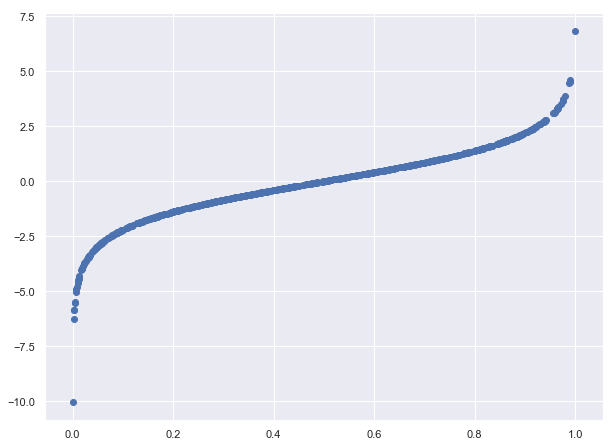

In [150]:
plt.scatter(x,y)